En el anterior notebook se mencionó que se realizaría una red neuronal convolucional. Sin embargo, el curso tuvo un error ya que en realidad lo que se implementó fue una red neuronal Fully Connected.

Por tal motivo, en este notebook se realizará nuevamente el entrenamiento empleando de manera correcta una red neuronal convolucional obtenido del siguiente [tutorial](https://www.tensorflow.org/tutorials/images/cnn?hl=es)

____________________________

## Librerías

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt

## Cargando datos

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los *labels* son un arreglo de integros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidoen el dataset, almacenelo aca para usarlos luego cuando se visualicen las imagenes:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploración del dataset

Tenemos 60,000 imágenes de 28x28 pixeles

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = train_images.reshape(-1, 28, 28, 1)

## Pre-procesamiento del dataset

El set de datos debe ser pre-procesada antes de entrenar la red. Al inspeccionar la primera imagen en el set de entrenamiento, tenemos que los valores de los pixeles estan entre 0 y 255:

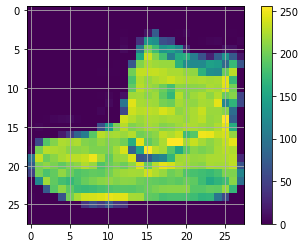

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

Se dividen los pixeles de las imágenes entre 255 para normalizar los valores de los pixeles y trabajar con datos entre 0 y 1. Un pixel con valor 0 es color negro, y uno con valor 255 es blanco

Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Veamos las primeras 25 imágenes con sus correspondientes *labels* para verificar el dataset

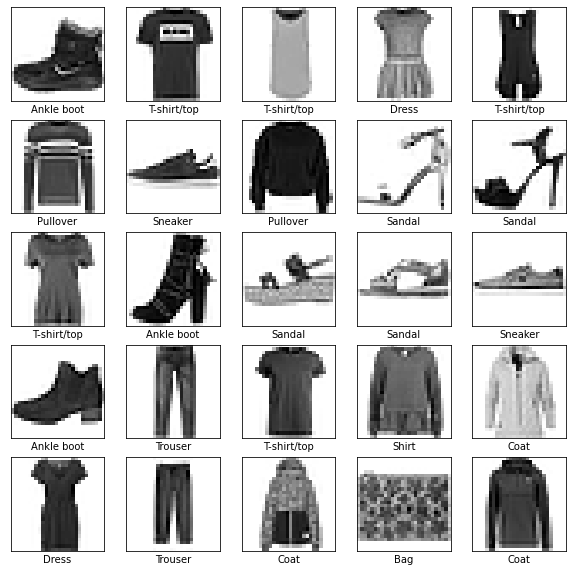

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Creando la base convolucional

Las 6 líneas de código a continuación definen la base convolucional utilizando un patrón común: una pila de capas [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?hl=es) y [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?hl=es).

Como entrada, una CNN toma tensores de forma (altura_imagen, ancho_imagen, canales_color), ignorando el tamaño del lote. Si eres nuevo en estas dimensiones, color_channels se refiere a (R,G,B). En este ejemplo, configurará su CNN para procesar entradas de forma (28, 28, 3)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2022-05-07 21:14:13.478845: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-07 21:14:13.479224: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-07 21:14:13.481676: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Arriba, puede ver que la salida de cada capa Conv2D y MaxPooling2D es un tensor de forma 3D (alto, ancho, canales). Las dimensiones de ancho y alto tienden a reducirse a medida que se profundiza en la red. El número de canales de salida para cada capa Conv2D está controlado por el primer argumento (por ejemplo, 32 o 64). Por lo general, a medida que se reducen el ancho y el alto, puede permitirse (computacionalmente) agregar más canales de salida en cada capa Conv2D.

## Agregando capas densas

Para completar el modelo, se alimentará el último tensor de salida de la base convolucional (de forma (4, 4, 64)) en una o más capas densas para realizar la clasificación. Las capas densas toman vectores como entrada (que son 1D), mientras que la salida actual es un tensor 3D. Primero, aplanará (o desenrollará) la salida 3D a 1D, luego agregará una o más capas densas en la parte superior. Nuestro set de datos tiene 10 clases de salida, por lo que usa una capa Densa final con 10 salidas.

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

- *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
- *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
- *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [13]:
model.compile(optimizer=tf.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

## Entrenamiento del modelo

Se entrena el modelo para que aprenda a asociar las imágenes y etiquetas.

In [14]:
history = model.fit(train_images, train_labels, epochs=5)

2022-05-07 21:14:14.138261: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-07 21:14:14.138754: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2208005000 Hz


Epoch 1/5
1875/1875 [==============================] - 189s 100ms/step - loss: 0.6999 - accuracy: 0.7401
Epoch 2/5
1875/1875 [==============================] - 209s 111ms/step - loss: 0.3351 - accuracy: 0.8778
Epoch 3/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.2851 - accuracy: 0.8954
Epoch 4/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.2447 - accuracy: 0.9088
Epoch 5/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.2230 - accuracy: 0.9165


## Evaluando la exactitud

In [21]:
loss = history.history['loss']
accuracy = history.history['accuracy']

In [28]:
accuracy

[0.8175333142280579,
 0.8817999958992004,
 0.8986166715621948,
 0.9093999862670898,
 0.9179166555404663]

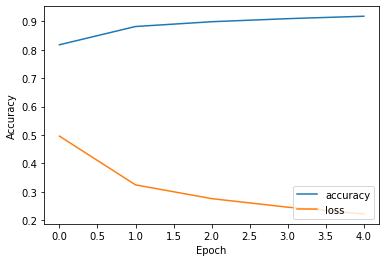

In [26]:
plt.plot(accuracy, label='accuracy')
plt.plot(loss, label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [41]:
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1),  test_labels)

313/313 [==============================] - 8s 24ms/step - loss: 0.2637 - accuracy: 0.9048


In [42]:
print(test_acc)

0.9047999978065491
